<a href="https://colab.research.google.com/github/Suraj722004/garbage_detection/blob/main/Garbage_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import zipfile
import shutil
import yaml
from ultralytics import YOLO
from google.colab import files
from PIL import Image

print("Upload your dataset ZIP (should contain 'images/train', 'images/val', 'labels/train', 'labels/val'):")
uploaded = files.upload("archive.zip")


Upload your dataset ZIP (should contain 'images/train', 'images/val', 'labels/train', 'labels/val'):


Saving archive.zip to archive.zip/archive.zip


In [4]:
import zipfile
import os

zip_path = list(uploaded.keys())[0]   # automatically uses uploaded file name

extract_path = "/content/garbage_dataset"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted to:", extract_path)


Dataset extracted to: /content/garbage_dataset


In [10]:
!pip install split-folders
import splitfolders
import os

initial_extract_path = extract_path # This is /content/garbage_dataset

# Auto-detect the actual dataset root if the zip contained a single top-level folder
extracted_contents = os.listdir(initial_extract_path)

if len(extracted_contents) == 1 and os.path.isdir(os.path.join(initial_extract_path, extracted_contents[0])):
    input_folder = os.path.join(initial_extract_path, extracted_contents[0])
    print(f"Detected single subfolder '{extracted_contents[0]}'. Setting input_folder to: {input_folder}")
else:
    input_folder = initial_extract_path
    print(f"No single subfolder detected or multiple items. Setting input_folder to: {input_folder}")


output_folder = "/content/datasets/garbage"

splitfolders.ratio(input_folder, output=output_folder, seed=42,
                   ratio=(0.8, 0.2))   # 80% train, 20% val

print("Dataset prepared for YOLO classification.")

Detected single subfolder 'garbage-dataset'. Setting input_folder to: /content/garbage_dataset/garbage-dataset


Copying files: 19762 files [00:08, 2424.27 files/s]

Dataset prepared for YOLO classification.


In [11]:
from ultralytics import YOLO

model = YOLO("yolov8l-cls.pt")   # large model = higher accuracy

model.train(
    data="/content/datasets/garbage",
    epochs=40,
    imgsz=224,
    lr0=0.001,
    batch=32,
)


Ultralytics 8.3.230 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/garbage, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

KeyboardInterrupt: 

Testing on: /content/datasets/garbage/val/paper/paper_1557.jpg


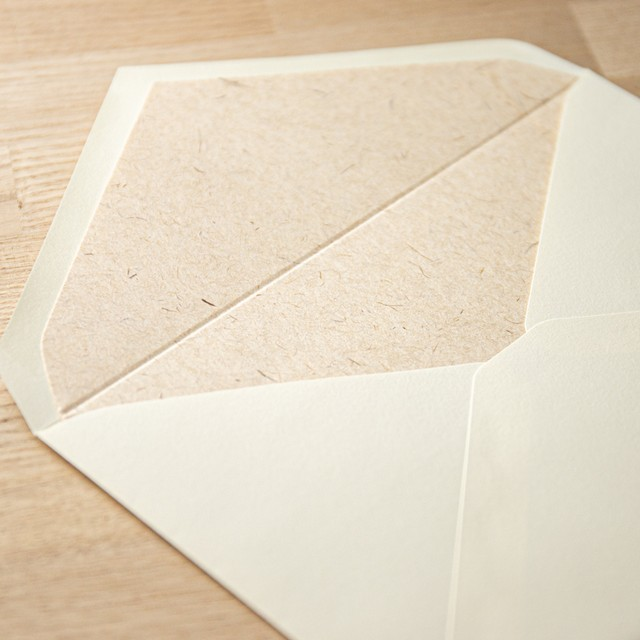


image 1/1 /content/datasets/garbage/val/paper/paper_1557.jpg: 224x224 cardboard 0.17, clothes 0.16, trash 0.10, paper 0.09, metal 0.09, 376.5ms
Speed: 9.5ms preprocess, 376.5ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


In [17]:
import random
import glob
from IPython.display import display
from PIL import Image

# pick random image from dataset
# Update the path to look into the newly created dataset folders
img_list = glob.glob("/content/datasets/garbage/*/*/*.jpg") + glob.glob("/content/datasets/garbage/*/*/*.png")
test_img = random.choice(img_list)

print("Testing on:", test_img)
display(Image.open(test_img))

results = model.predict(test_img)